In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import urllib.request
import zipfile

ZIP file already exists. Skipping download.
Extraction completed.
CSV file loaded successfully.
Training samples: 503
Validation samples: 168
Testing samples: 168


C:\Users\swaro\AppData\Local\Temp\ipykernel_17760\1818746710.py:17: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(csv_path, sep=';', decimal=',', parse_dates=[['Date', 'Time']], infer_datetime_format=True)
C:\Users\swaro\AppData\Local\Temp\ipykernel_17760\1818746710.py:17: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(csv_path, sep=';', decimal=',', parse_dates=[['Date', 'Time']], infer_datetime_format=True)
C:\Users\swaro\AppData\Local\Temp\ipykernel_17760\1818746710.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 24, 64)         │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,857 (116.63 KB)

 Trainable params: 29,857 (116.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0554 - mae: 0.1787 - val_loss: 0.0360 - val_mae: 0.1349
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0325 - mae: 0.1339 - val_loss: 0.0306 - val_mae: 0.1423
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0296 - mae: 0.1332 - val_loss: 0.0359 - val_mae: 0.1364
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0265 - mae: 0.1272 - val_loss: 0.0341 - val_mae: 0.1375
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0280 - mae: 0.1318 - val_loss: 0.0409 - val_mae: 0.1463
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0243 - mae: 0.1189 - val_loss: 0.0355 - val_mae: 0.1417
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0243 - mae: 0.1200 - val_loss: 0.0349 - val_mae: 0.1491
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0229 - mae: 0.1181 - val_loss: 0.0347 - val_mae: 0.1388
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.021

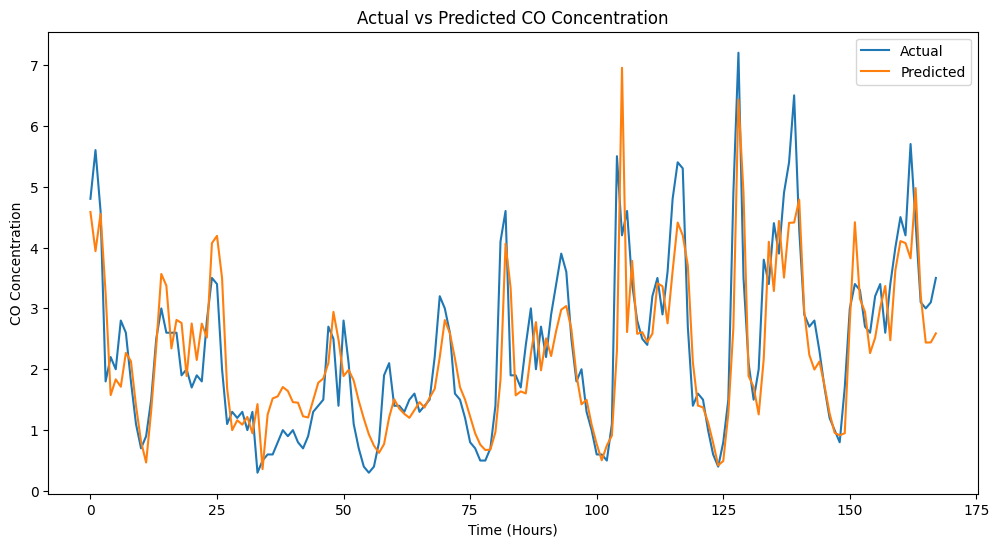

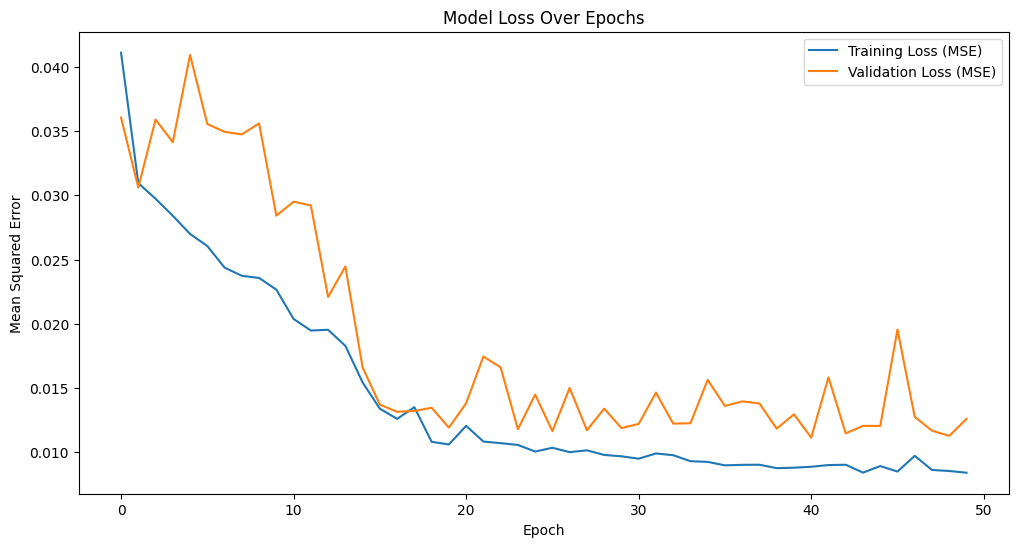

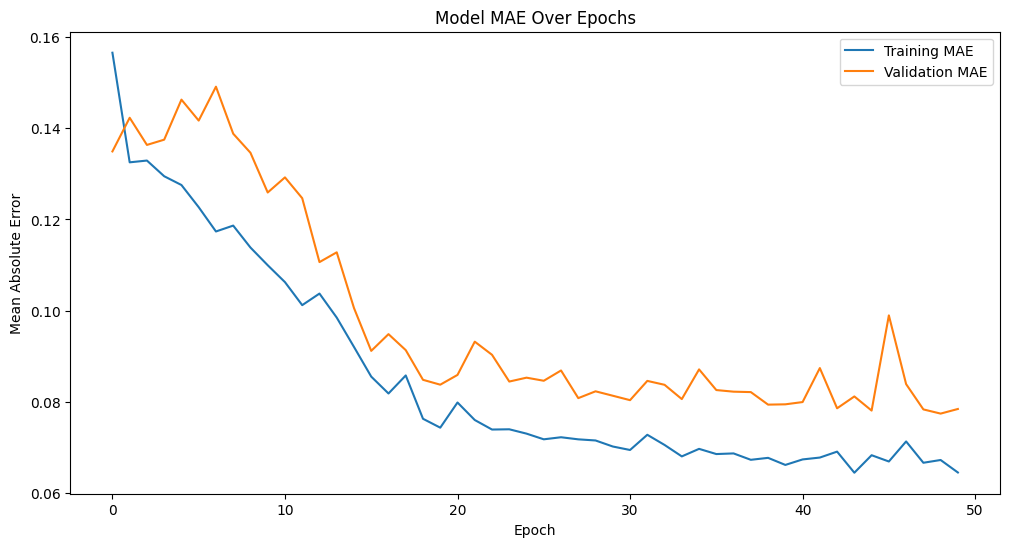

In [4]:
def download_and_extract_data(zip_url='https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip', extract_to='.'):
    zip_path = os.path.join(extract_to, 'AirQualityUCI.zip')
    if not os.path.exists(zip_path):
        print("Downloading Air Quality dataset...")
        urllib.request.urlretrieve(zip_url, zip_path)
        print("Download completed.")
    else:
        print("ZIP file already exists. Skipping download.")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
        print("Extraction completed.")
    csv_path = os.path.join(extract_to, 'AirQualityUCI.csv')
    return csv_path

def load_and_preprocess_data(csv_path, selected_features=['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)']):
    try:
        df = pd.read_csv(csv_path, sep=';', decimal=',', parse_dates=[['Date', 'Time']], infer_datetime_format=True)
        print("CSV file loaded successfully.")
    except pd.errors.ParserError as e:
        print(f"Error parsing CSV file: {e}")
        df = pd.read_csv(csv_path, sep=';', decimal=',', parse_dates=[['Date', 'Time']], infer_datetime_format=True, on_bad_lines='skip')
        print("CSV file loaded with warnings.")
    df.drop(columns=['Unnamed: 15', 'Unnamed: 16'], inplace=True, errors='ignore')
    data = df[selected_features]
    data = data.replace(-200, np.nan).dropna()
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data)
    return normalized_data, scaler

def create_sequences(data, seq_length=24):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape),
        LSTM(32),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='mse',
                  metrics=['mae'])
    return model

def train_model(model, X_train, y_train, X_val, y_val, epochs=50, batch_size=32):
    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=epochs,
                        batch_size=batch_size,
                        verbose=1)
    return history

def plot_results(y_true, y_pred, num_samples=100):
    plt.figure(figsize=(12, 6))
    plt.plot(y_true[:num_samples], label='Actual')
    plt.plot(y_pred[:num_samples], label='Predicted')
    plt.title('Actual vs Predicted CO Concentration')
    plt.xlabel('Time (Hours)')
    plt.ylabel('CO Concentration')
    plt.legend()
    plt.show()

def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss (MSE)')
    plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
    plt.title('Model Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('Model MAE Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error')
    plt.legend()
    plt.show()
def main():
    csv_path = download_and_extract_data()
    normalized_data, scaler = load_and_preprocess_data(csv_path)
    X, y = create_sequences(normalized_data, seq_length=24)
    X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, shuffle=False)
    print(f"Training samples: {X_train.shape[0]}")
    print(f"Validation samples: {X_val.shape[0]}")
    print(f"Testing samples: {X_test.shape[0]}")
    model = build_lstm_model(input_shape=(X.shape[1], X.shape[2]))
    model.summary()
    history = train_model(model, X_train, y_train, X_val, y_val, epochs=50, batch_size=32)
    test_loss, test_mae = model.evaluate(X_test, y_test)
    print(f"Test Mean Squared Error: {test_loss:.4f}")
    print(f"Test Mean Absolute Error: {test_mae:.4f}")
    y_pred = model.predict(X_test)
    y_test_original = scaler.inverse_transform(
        np.hstack((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], normalized_data.shape[1]-1))))
    )[:, 0]
    y_pred_original = scaler.inverse_transform(
        np.hstack((y_pred, np.zeros((y_pred.shape[0], normalized_data.shape[1]-1))))
    )[:, 0]
    plot_results(y_test_original, y_pred_original, num_samples=200)
    plot_training_history(history)

if __name__ == "__main__":
    main()